In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load train and test data
train_data = pd.read_csv("Htrain1.csv")
test_data = pd.read_csv("Htest1.csv")

# Separate features and target variable
X_train = train_data.drop(columns=['SalePrice'])
y_train = train_data['SalePrice']
X_test = test_data.copy()

# Identify numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Full preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess train and test data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)


In [3]:
# Preprocess train and test data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Inspect the shape of preprocessed data
print("Shape of X_train_preprocessed:", X_train_preprocessed.shape)
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)

# Inspect the first few rows of preprocessed data
print("First few rows of X_train_preprocessed:")
print(X_train_preprocessed[:5])


Shape of X_train_preprocessed: (1460, 289)
Shape of X_test_preprocessed: (1459, 289)
First few rows of X_train_preprocessed:
  (0, 0)	-1.730864877400689
  (0, 1)	0.07337496353744775
  (0, 2)	-0.22937175311444924
  (0, 3)	-0.20714170777431132
  (0, 4)	0.6514792433257054
  (0, 5)	-0.5171998069472914
  (0, 6)	1.0509937888999856
  (0, 7)	0.8786680880058696
  (0, 8)	0.5114184144641142
  (0, 9)	0.5754248369676035
  (0, 10)	-0.2886528311122454
  (0, 11)	-0.9445906057378156
  (0, 12)	-0.4593025408311876
  (0, 13)	-0.7934337933349002
  (0, 14)	1.1618515874685553
  (0, 15)	-0.12024172373467248
  (0, 16)	0.3703334392167798
  (0, 17)	1.1078101491462133
  (0, 18)	-0.24106103579929677
  (0, 19)	0.7897405221108432
  (0, 20)	1.2275853765130371
  (0, 21)	0.1637791168735145
  (0, 22)	-0.21145358120204893
  (0, 23)	0.9122097711603002
  (0, 24)	-0.9512264882332893
  :	:
  (4, 170)	1.0
  (4, 176)	1.0
  (4, 179)	1.0
  (4, 185)	1.0
  (4, 190)	1.0
  (4, 191)	1.0
  (4, 197)	1.0
  (4, 206)	1.0
  (4, 208)	1.0
  

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X_train_selected = X_train[features]

# Training the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_selected, y_train)

# Making predictions on the training set
train_predictions = linear_reg.predict(X_train_selected)

# Calculating training set RMSE
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
print("Training set RMSE:", train_rmse)


Training set RMSE: 51269.241808499355


In [5]:
# Print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)


Coefficients: [   110.06172639 -27859.33222353  29694.68839062]
Intercept: 47509.48218946546


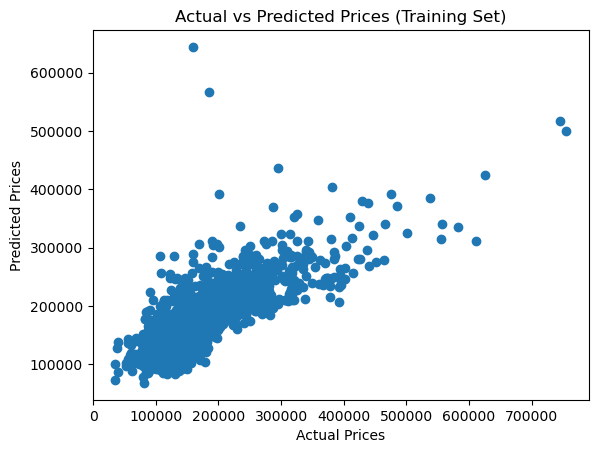

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_train, train_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Set)")
plt.show()
